In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/raj/Documents/Corpnce AI/practice/data/NetFlix.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


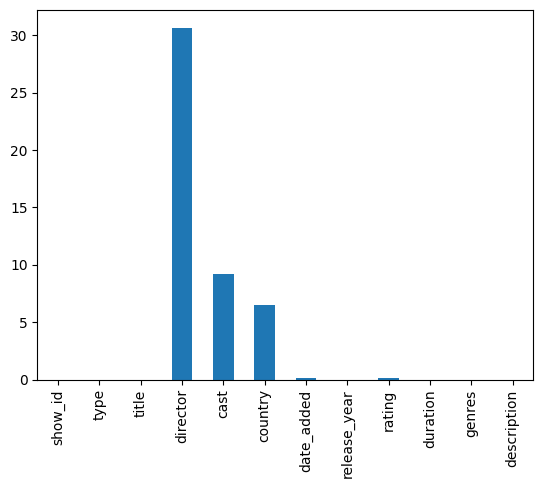

In [9]:
((data.isnull().sum()/len(data)) * 100).plot(kind = 'bar');

# how many movies and tv shows are released 

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


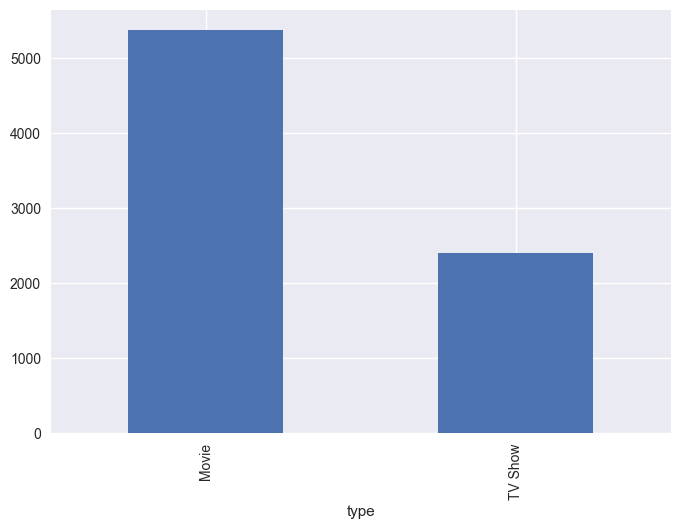

In [7]:
plt.style.use('seaborn-v0_8')
print(data['type'].value_counts())
data['type'].value_counts().plot(kind = 'bar');

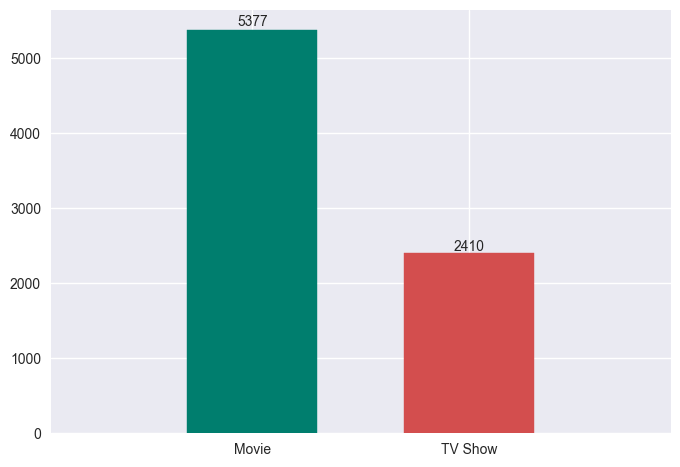

In [8]:
plt.style.use('seaborn-v0_8')
temp = data['type'].value_counts()
fig, ax = plt.subplots()
gp = ax.bar(temp.index, temp.values, width=0.3)
x_positions = [0.1, 0.6]
colors = ['#007E6E', '#D34E4E']
for patch, new_x, val, c in zip(gp.patches, x_positions, temp.values, colors):
    patch.set_x(new_x)
    patch.set_color(c)
    h = patch.get_height()
    w = patch.get_width()
    ax.text(new_x + w/2, h + h * 0.01, str(val), ha='center')
ax.set_xticks([x + 0.15 for x in x_positions])  # centers text under bars
ax.set_xticklabels(temp.index)
plt.show()

## top 5 countries with Max no of movies released between 2015 to 2020 

In [18]:
# Step 1: Replace nan with empty string
data['country'] = data['country'].fillna('')


print(data['country'].str.split(','))

# Step 2: Split comma-separated country lists
data['country_list'] = data['country'].apply(lambda x: [i.strip() for i in x.split(',')] if x else [])
print(data['country_list'])


# Step 3: Convert to one-hot encoded dummy variables
dummies = data['country_list'].explode().str.get_dummies().groupby(level=0).sum()
print(dummies)

0                         [Brazil]
1                          [India]
2                      [Indonesia]
3                  [United States]
4                 [United Kingdom]
                   ...            
7782                      [Canada]
7783                       [Japan]
7784    [France,  Belgium,  Spain]
7785               [United States]
7786               [United States]
Name: country, Length: 7787, dtype: object
0                       [Brazil]
1                        [India]
2                    [Indonesia]
3                [United States]
4               [United Kingdom]
                  ...           
7782                    [Canada]
7783                     [Japan]
7784    [France, Belgium, Spain]
7785             [United States]
7786             [United States]
Name: country_list, Length: 7787, dtype: object
      Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
0               0        0        0       0          0        0          0   
1    

In [31]:
dummies['United States'].sum().item()
# print(dummies)

3297

In [29]:
dummies['United States'].sum().item()
print(dummies)

      Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
0               0        0        0       0          0        0          0   
1               0        0        0       0          0        0          0   
2               0        0        0       0          0        0          0   
3               0        0        0       0          0        0          0   
4               0        0        0       0          0        0          0   
...           ...      ...      ...     ...        ...      ...        ...   
7782            0        0        0       0          0        0          0   
7783            0        0        0       0          0        0          0   
7784            0        0        0       0          0        0          0   
7785            0        0        0       0          0        0          0   
7786            0        0        0       0          0        0          0   

      Austria  Azerbaijan  Bahamas  ...  Ukraine  United Arab E

In [ ]:
pd.concat([data, dummies], axis = 1)

In [39]:
data = pd.concat([data, dummies], axis = 1)
data.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'genres',
 'description',
 'country_list',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Monteneg

In [184]:
data.drop('country', axis = 1, inplace = True)

In [185]:
data.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,"September 25, 2021",2020,PG-13,90 min,Documentaries,...,0,0,0,1,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,0,0,0,0,0,0,0,0,0,0


In [41]:
print(data['date_added'])
data['date_added'] = data['date_added'].str.strip()
print(data['date_added'])
data['date_added'] = pd.to_datetime(data['date_added'])
print(data['date_added'])

0       14-Aug-20
1       15-Dec-17
2        5-Jan-19
3        1-Mar-16
4        3-Dec-18
          ...    
7782    12-Jul-19
7783     1-Sep-20
7784    26-Aug-16
7785     8-Mar-19
7786     6-Dec-16
Name: date_added, Length: 7787, dtype: object
0       14-Aug-20
1       15-Dec-17
2        5-Jan-19
3        1-Mar-16
4        3-Dec-18
          ...    
7782    12-Jul-19
7783     1-Sep-20
7784    26-Aug-16
7785     8-Mar-19
7786     6-Dec-16
Name: date_added, Length: 7787, dtype: object
0      2020-08-14
1      2017-12-15
2      2019-01-05
3      2016-03-01
4      2018-12-03
          ...    
7782   2019-07-12
7783   2020-09-01
7784   2016-08-26
7785   2019-03-08
7786   2016-12-06
Name: date_added, Length: 7787, dtype: datetime64[ns]


/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_50834/4131330927.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_added'] = pd.to_datetime(data['date_added'])


In [43]:
data['date_added'].dt.day

0       14.0
1       15.0
2        5.0
3        1.0
4        3.0
        ... 
7782    12.0
7783     1.0
7784    26.0
7785     8.0
7786     6.0
Name: date_added, Length: 7787, dtype: float64

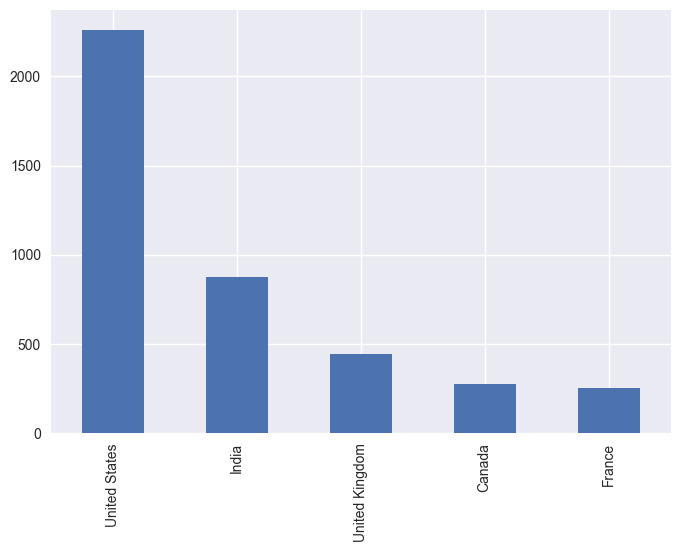

In [188]:
temp = data.loc[(data['date_added'].dt.year >= 2015) &
                (data['date_added'].dt.year <= 2020) &
                (data['type'] == 'Movie'), dummies.columns.tolist()]
temp.sum().sort_values(ascending = False)[:5].plot(kind = 'bar');

## find which genre movies are most popular in us

## The distribution of movies by length

## Which month of the year has seen the most release after 2015

## Which actors acted in most movies

In [189]:
# dummies['Ama Qamata'].sum().item()

## The distribution of movies by len

In [203]:
temp = data.loc[data['type'] == 'Movie', ['duration', 'title']]
temp.dropna(inplace = True)
temp.duration = temp.duration.str.replace(r'[A-Za-z]', '', regex = True)
temp.duration = temp.duration.str.strip()
temp.duration = temp.duration.astype(int)
shortest_movie = temp.loc[temp.duration == temp.duration.min(), :]
longest_movie = temp.loc[temp.duration == temp.duration.max(), :]
print(shortest_movie)
print(longest_movie)
# ----- Matplotlib ------- 
# fig, ax = plt.subplots()
# ax.hist(temp, bins = 40, color = '#BF1A1A', edgecolor = 'w', density = True)
# sns.kdeplot(temp, ax = ax, color = 'k')
# ax.yaxis.set_visible(False);

      duration   title
3777         3  Silent
      duration                       title
4253       312  Black Mirror: Bandersnatch


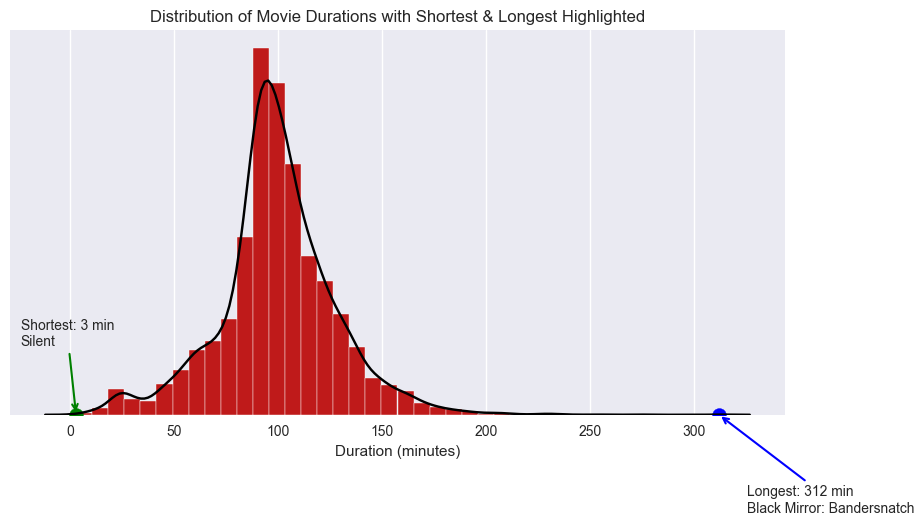

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(temp.duration, bins=40, color='#BF1A1A', edgecolor='white', density=True)
sns.kdeplot(temp.duration, ax=ax, color='black')

# Annotate shortest movie
ax.scatter(shortest_movie.duration.values[0], 0, color='green', s=100)
ax.annotate(
    f"Shortest: {shortest_movie.duration.values[0]} min\n{shortest_movie.title.values[0]}",
    xy=(shortest_movie.duration.values[0], 0),
    xytext=(-40, 50),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=1.5, color="green"),
    fontsize=10
)

# Annotate longest movie
ax.scatter(longest_movie.duration.values[0], 0, color='blue', s=100)
ax.annotate(
    f"Longest: {longest_movie.duration.values[0]} min\n{longest_movie.title.values[0]}",
    xy=(longest_movie.duration.values[0], 0),
    xytext=(20, -70),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=1.5, color="blue"),
    fontsize=10
)

# Formatting
ax.set_xlabel("Duration (minutes)")
ax.set_title("Distribution of Movie Durations with Shortest & Longest Highlighted")
ax.yaxis.set_visible(False)

plt.show()


In [207]:
temp = data.loc[data['type'] == 'Movie', ['duration', 'title', 'release_year']]
temp.dropna(inplace = True)
temp.duration = temp.duration.str.replace(r'[A-Za-z]', '', regex = True)
temp.duration = temp.duration.str.strip()
temp.duration = temp.duration.astype(int)

,duration,title,release_year
0,90,Dick Johnson Is Dead,2020
6,91,My Little Pony: A New Generation,2021
7,125,Sankofa,1993
9,104,The Starling,2021
12,127,Je Suis Karl,2021
...,...,...,...
8801,96,Zinzana,2015
8802,158,Zodiac,2007
8804,88,Zombieland,2009
8805,88,Zoom,2006


In [216]:
x = temp.groupby('release_year')['duration'].median()
y = temp.groupby('release_year')['duration'].quantile(0.25)
z = temp.groupby('release_year')['duration'].quantile(0.75)

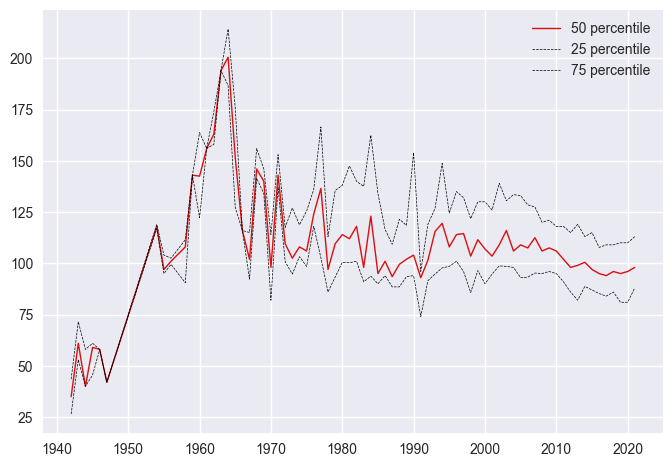

In [230]:
plt.plot(x.index, x.values, label = '50 percentile', color = '#DC0E0E', linewidth = 1);
plt.plot(y.index, y.values, label = '25 percentile', color = 'k', linestyle = '--', linewidth = 0.5);
plt.plot(z.index, z.values, label = '75 percentile', color = 'k', linestyle = '--', linewidth = 0.5);
plt.legend();